<a href="https://colab.research.google.com/github/akshaypt7/amazon_sales_prediction/blob/main/my_project_01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introductions

#### Improvements from 1.01

- Here we are planning to improve the results we got from 1.2, by introducing Embedding. We create embeddings for the neural network we will also try to use the same in random forest and see its performance.

  We need to refresh our knowledge on Embeddgings. first we will write about it and then we can also look at the excersice we have done earlier.

**Refer this - https://towardsdatascience.com/enhancing-categorical-features-with-entity-embeddings-e6850a5e34ff**

#### Importing Libraries

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 11.5 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 188 kB 50.2 MB/s 
     |████████████████████████████████| 1.2 MB 41.0 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 292 kB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
# from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
# from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [ ]:
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers import Dense, Flatten, Dropout, Input, Embedding, Reshape
from keras.layers import concatenate
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import pickle
import csv
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import math
from sklearn.model_selection import train_test_split

import pandas as pd

#### Loading the Dataframe

In [ ]:
infile = open('/content/gdrive/MyDrive/bluebook/df_main.pkl','rb')
df_main = pickle.load(infile)

In [ ]:
df_main = add_datepart(df_main,'date')

In [ ]:
df_main.head()

,Asin,Item Promo Discount,price,hour,...,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,B07KYFHTGF,0.00,1995.00,12.0,...,False,False,False,1.609718e+09
1,B07TM3LRVB,-56.75,1078.25,20.0,...,False,False,False,1.610064e+09
2,B08976V1BZ,-79.95,1519.05,22.0,...,False,False,False,1.610150e+09
3,B07TM3LRVB,0.00,1135.00,10.0,...,False,False,False,1.610323e+09
4,B08332221J,0.00,1499.00,12.0,...,False,False,False,1.610410e+09


In [ ]:
df_main.columns

Index(['Asin', 'Item Promo Discount', 'price', 'hour', 'Quantity',
       'Invoice Amount', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

In [ ]:
import math

#### Xtrain and X_valid

In [ ]:
procs = [Categorify, FillMissing]

In [ ]:

dep_var = 'Quantity'

In [ ]:
cont, cat = cont_cat_split( df_main,1,dep_var= dep_var)

In [ ]:
cont =['Item Promo Discount',
 'price',
 'Invoice Amount',
 'Year',
 'Elapsed']

In [ ]:
cat = ['Asin',
 'Is_month_end',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Is_year_start',
 'hour','Month','Week', 'Day','Dayofweek','Dayofyear']

In [ ]:
# SPLITS 
condition = (df_main.Year < 2020) | (df_main.Month < 8)
train_idx = np.where(condition)[0]
valid_idx = np.where(~condition)[0]

In [ ]:
len(train_idx), len(valid_idx)

(7517, 3429)

In [ ]:
splits = (list(train_idx),list(valid_idx))

In [ ]:

to = TabularPandas(df_main, procs= procs,cat_names= cat, cont_names=cont, splits= splits,y_names=dep_var)

In [ ]:
x_train,y_train = to.train.xs, to.train.y
x_valid, y_valid = to.valid.xs, to.valid.y

In [ ]:
df_main.Month.unique()

array([ 1,  2, 12,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
x_train.Month.unique() , x_train.Month.nunique()

(array([ 1,  2,  3,  4,  5,  6,  7, 10,  9,  8], dtype=int8), 10)

##### New splits 

In [ ]:
condition_1 = (df_main.Year < 2022)
train_idx_1 = np.where(condition_1)[0]
valid_idx_1 = np.where(~condition_1)[0]

In [ ]:
len(train_idx_1), len(valid_idx_1)

(10946, 0)

In [ ]:
splits_1 = (list(train_idx_1),list(valid_idx_1))

In [ ]:

to_1 = TabularPandas(df_main, procs= procs,cat_names= cat, cont_names=cont, splits= splits_1,y_names=dep_var)

In [ ]:
x_train_1,y_train_1 = to_1.train.xs, to_1.train.y
x_valid_1, y_valid_1 = to_1.valid.xs, to_1.valid.y

In [ ]:
x_train_1.Month.unique() , x_train_1.Month.nunique()

(array([ 1,  2, 12,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int8), 12)

### Rough Work

One thing we have to note is we have done embedding in univ.ai with dictionary.

#### Encoding

[input_asin, input_hour, input_dayofweek, input_month, input_day, input_week ]

In [ ]:
df_main.columns

Index(['Asin', 'Item Promo Discount', 'price', 'hour', 'Quantity',
       'Invoice Amount', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

In [ ]:
cat = ['Asin',
 'Is_month_end',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Is_year_start',
 'hour','Month','Week', 'Day','Dayofweek','Dayofyear']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_main.drop(['Quantity'],axis=1), df_main['Quantity'], test_size=0.1, random_state=42)

In [ ]:
enc = OrdinalEncoder()
enc.fit(df_main[cat])
df_main[cat]= enc.transform(df_main[cat])

In [ ]:
df_main.head()

,Asin,Item Promo Discount,price,hour,...,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1.0,0.00,1995.00,12.0,...,0.0,0.0,0.0,1.609718e+09
1,7.0,-56.75,1078.25,20.0,...,0.0,0.0,0.0,1.610064e+09
2,27.0,-79.95,1519.05,22.0,...,0.0,0.0,0.0,1.610150e+09
3,7.0,0.00,1135.00,10.0,...,0.0,0.0,0.0,1.610323e+09
4,21.0,0.00,1499.00,12.0,...,0.0,0.0,0.0,1.610410e+09


### Embedding

In [ ]:
# embedding for ASiN
n_unique_asins = df_main.Asin.nunique()
n_dim_asins = int(math.sqrt(n_unique_asins))


input_asin = Input(shape=(1,))
output_asin = Embedding(input_dim = n_unique_asins, output_dim= n_dim_asins, name='asin')(input_asin)
output_asin = Reshape(target_shape=(n_dim_asins,))(output_asin)

In [ ]:
# embedding for hour
n_unique_hour = df_main.hour.nunique()
n_dim_hours = int(math.sqrt(n_unique_hour))

input_hour = Input(shape=(1,))
output_hour = Embedding(input_dim= n_unique_hour, output_dim=n_dim_hours,name='hours')(input_hour)
output_hour = Reshape( target_shape= (n_dim_hours,))(output_hour)

In [ ]:
# day_of week
n_unique_day_of_week = df_main['Dayofweek'].nunique()
n_dim_dayofweek = 3

input_dayofweek = Input(shape=(1,))
output_dayofweek = Embedding(input_dim= n_unique_day_of_week, output_dim=n_dim_dayofweek,name='dayofweek')(input_dayofweek)
output_dayofweek = Reshape( target_shape= (n_dim_dayofweek,))(output_dayofweek)

In [ ]:
# Month
n_unique_month = df_main['Month'].nunique()
n_dim_month = 7

input_month = Input(shape=(1,))
output_month = Embedding(input_dim= n_unique_month, output_dim=n_dim_month,name='month')(input_month)
output_month = Reshape( target_shape= (n_dim_month,))(output_month)

In [ ]:
# Day (1-31)
n_unique_day = df_main['Day'].nunique()
n_dim_day = int(math.sqrt(n_unique_day))

input_day = Input(shape=(1,))
output_day= Embedding(input_dim= n_unique_day, output_dim=n_dim_day,name='day')(input_day)
output_day = Reshape( target_shape= (n_dim_day,))(output_day)

In [ ]:
# Week (1-53)

n_unique_week = df_main['Week'].nunique()
n_dim_week = 30

input_week = Input(shape=(1,))
output_week= Embedding(input_dim= n_unique_week, output_dim=n_dim_week,name='week')(input_week)
output_week = Reshape( target_shape= (n_dim_week,))(output_week)


In [ ]:
input_layers = [input_asin, input_hour, input_dayofweek, input_month, input_day, input_week ]
output_layers = [output_asin, output_hour, output_dayofweek, output_month, output_day, output_week ] 
model = Concatenate()(output_layers)

In [ ]:

model = Dense(1000, kernel_initializer='uniform')(model)
model = Activation('relu')(model)

model = Dense(500, kernel_initializer='uniform')(model)
model = Activation('relu')(model)

model = Dense(1)(model)
model = Activation('sigmoid')(model)

In [ ]:
modelNN_emb = KerasModel(inputs=input_layers, outputs=model)
modelNN_emb.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 1)]          0                                            
____________________________________________________________________________________________

In [ ]:


from tensorflow.keras.optimizers import Adam
opt =  Adam(lr=0.05)
modelNN_emb.compile(loss='mae', optimizer=opt, metrics=['mae'])



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

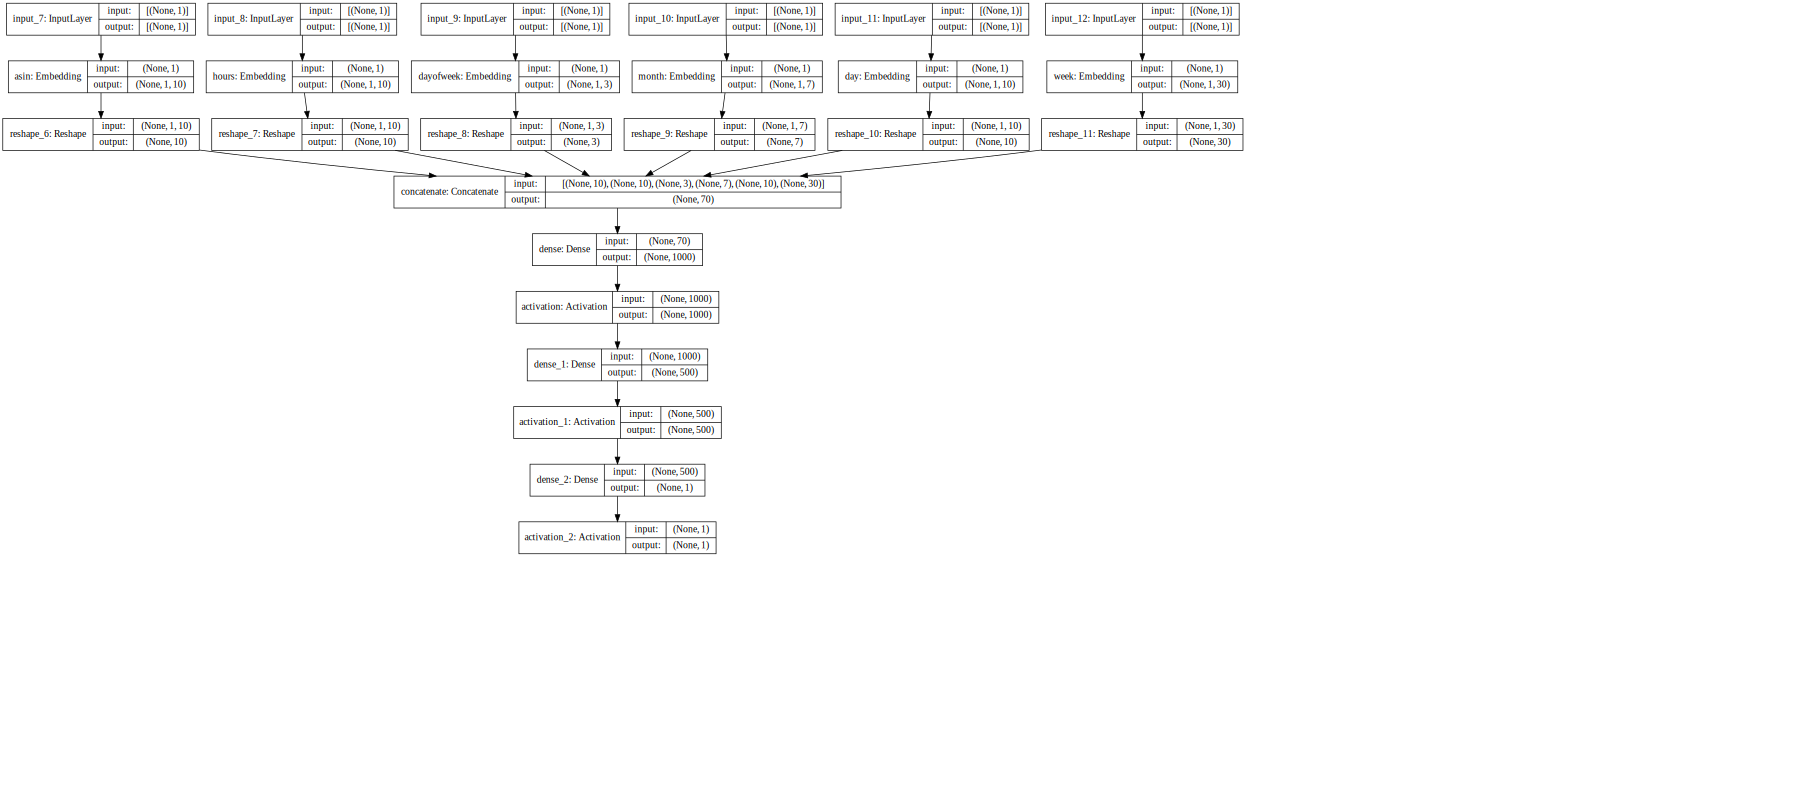

In [ ]:
SVG(model_to_dot(modelNN_emb,  show_shapes=True, show_layer_names=True, dpi=50, rankdir='TB').create_svg())

In [ ]:
def split_features(X):
    X_list = []

    asin = X[:, [0]].reshape(-1,1)
    X_list.append(asin)

    hour = X[:, [3]].reshape(-1,1)
    X_list.append(hour)

    dayofweek = X[:, [10]].reshape(-1,1)
    X_list.append(dayofweek)

    month = X[:, [7]].reshape(-1,1)
    X_list.append(month)

    day = X[:, [9]].reshape(-1,1)
    X_list.append(day)

    week = X[:, [8]].reshape(-1,1)
    X_list.append(week)

    return X_list

In [ ]:
def split_features(X):
    X_list = []

    asin = X[:, [0]].reshape(-1,1)
    X_list.append(asin)

    # hour = X[:, [3]].reshape(-1,1)
    # X_list.append(hour)

    # dayofweek = X[:, [10]].reshape(-1,1)
    # X_list.append(dayofweek)

    month = X[:, [1]].reshape(-1,1)
    X_list.append(month)

    # day = X[:, [9]].reshape(-1,1)
    # X_list.append(day)

    # week = X[:, [8]].reshape(-1,1)
    # X_list.append(week)

    return X_list

In [ ]:
def preprocessing(X):
    X_list = split_features(X)
    return X_list

In [ ]:
X = preprocessing(X_train.values)
X

[array([[ 7.],
        [ 1.],
        [ 7.],
        ...,
        [ 7.],
        [22.],
        [ 7.]]), array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])]

In [ ]:
x_train.nunique()

Asin                    46
Is_month_end             2
Is_month_start           2
Is_quarter_end           2
Is_quarter_start         2
Is_year_end              2
Is_year_start            2
hour                    24
Month                   10
Week                    45
Day                     31
Dayofweek                7
Dayofyear              305
Item Promo Discount     61
price                  157
Invoice Amount         268
Year                     3
Elapsed                442
dtype: int64

In [ ]:


modelNN_emb.checkpointer = ModelCheckpoint(filepath="best_model_weights.hdf5", verbose=1, save_best_only=True)
modelNN_emb.fit(preprocessing(X_train.values), y_train, epochs = 10, batch_size = 128, validation_data= (preprocessing(X_test.values),y_test), callbacks=[modelNN_emb.checkpointer])



Epoch 1/10


ValueError: ignored

In [ ]:
modelNN_emb.checkpointer = ModelCheckpoint(filepath="best_model_weights.hdf5", verbose=1, save_best_only=True)
modelNN_emb.fit(preprocessing(X_train.values), y_train.values.reshape(-1,1), epochs = 10, batch_size = 128, validation_data= (preprocessing(X_test.values), y_test.values.reshape(-1,1)), callbacks=[modelNN_emb.checkpointer])

Epoch 1/10


ValueError: ignored

### Conclusion

Why we were not able to create entity embedding was becasue of the few mistakes that we did.
- We passed in the dataframe to keras which was not processed, we had to ordinal encode it.
- we combined two methods, we could create embeddings using keras or using fastai. I was trying to do both. 